In [ ]:
# Load initial libraries
import numpy as np
import pandas as pd
import sklearn.metrics as skm
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from xgboost import XGBRegressor

import optuna
import os
import shutil


Notebook format:

Import Dataset
Modelling Phase 1 - Initial Models
Modelling Phase 2 - Model Optimisation
Evaluations of the models



In [95]:
# Import Cleaned/Processed Dataset

X = pd.read_csv('/Users/coletteford/Desktop/IGP/Dataset/german_x_20240418.csv')
y = pd.read_csv('/Users/coletteford/Desktop/IGP/Dataset/german_y_20240418.csv')
X.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   credit_amount_group                      1000 non-null   int64
 1   duration_group                           1000 non-null   int64
 2   business                                 1000 non-null   int64
 3   car_new                                  1000 non-null   int64
 4   car_used                                 1000 non-null   int64
 5   domestic_appliances                      1000 non-null   int64
 6   education                                1000 non-null   int64
 7   electronics                              1000 non-null   int64
 8   furniture_equipment                      1000 non-null   int64
 9   others                                   1000 non-null   int64
 10  repairs                                  1000 non-null   int64
 11  retra

Dataset Exploration:

Dataset consists of 25 columns excluding index.

Independent variables are a mixture of bools and integers due to preprocessing. This occludes normal summary statistics.

Thought: Are there spelling mistakes in any fields? How would we check?

Dependent variable are integers - Calculated Credit Score.

Reviewing X in BBEdit observations:
4 variables are ordinal categories: 
Occupation
Employment_length
Age Group
Number_of_dependents


Comparison to raw data

Dropped:
Duration in month
Credit Amount
Age
Installment rate in percentage of disposible income
present residence since
Number of existing credits at this bank
Number of people being liable to provide maintenance for
Status of existing checking account
Credit History
Savings account/bonds
Other debtors / guarantors
Property
Other installment plans
Telephone
Foreign worker
Personal status and sex
Sex
Personal status
Outcome
Risk(Outcome_text)

Added:




# 2. Train/Test of each model:

In [96]:
# Split the dataset into the train/test split for every model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

Multivariate LR Train R2 score:
0.8211880088536109
Multivariate LR Test R2 score:
0.7612497770746862


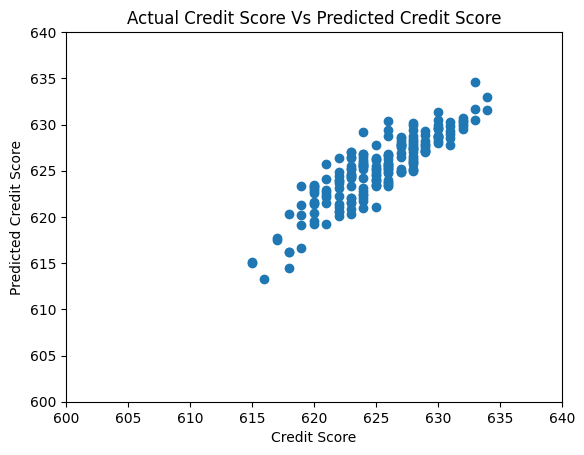

In [97]:
# 2. Train/Test of each model:


# Model number 1 - Multivariate Linear Model. Regularization not needed as all fields apart from credit score are binary or categorical

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Evaluation via R2 score for train and test
print("Multivariate LR Train R2 score:")
print(lr.score(X_train, y_train))
print("Multivariate LR Test R2 score:")
print(lr.score(X_test, y_test))

# Visualise predictions vs actuals

plt.scatter(y_test, y_pred)
plt.plot(skm.mean_squared_error(y_test, y_pred))

plt.xlabel("Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Actual Credit Score Vs Predicted Credit Score")
plt.xlim(600, 640)
plt.ylim(600,640)

plt.show()
plt.close()


# Evaluation of model by RMSE
rmse_lr = skm.mean_squared_error(y_test, y_pred, squared=False)
r2_lr = skm.r2_score(y_test, y_pred)

results_LR = pd.DataFrame(
    [['Linear Regression', rmse_lr, r2_lr]],
    columns=['Model', 'Root Mean Squared Error', 'R-squared']
)


Decision Tree Train R2 Score:  1.0
Decision Tree Test R2 Score:  0.7962797188067718


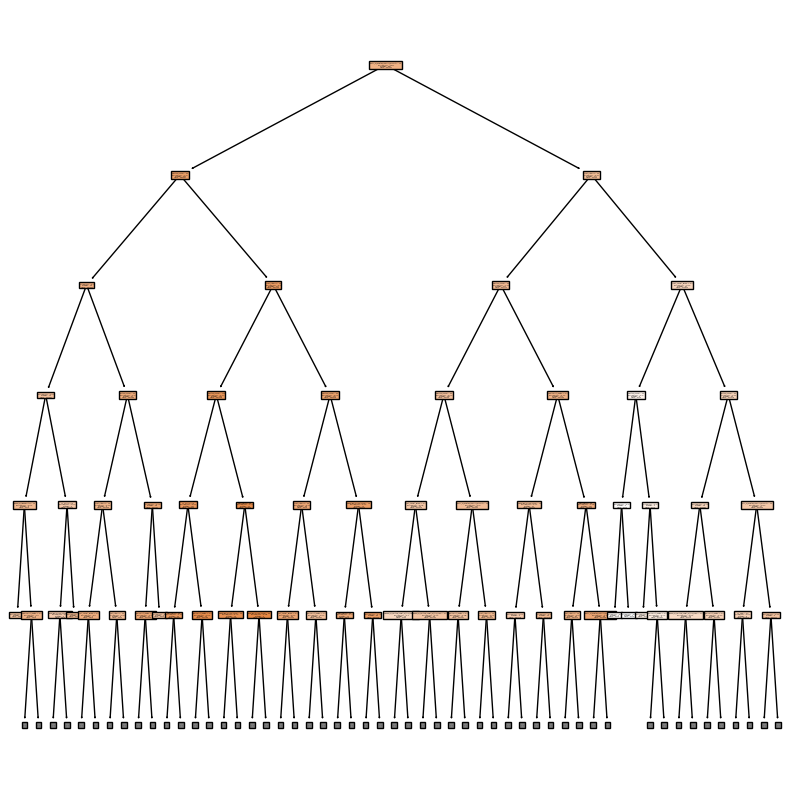

In [120]:
# Model number 2 - a Decision Tree Regression model

dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Decision Tree Train R2 Score: ', dtree.score(X_train, y_train))
print('Decision Tree Test R2 Score: ', dtree.score(X_test, y_test))

plt.figure(figsize=(10,10))
tree.plot_tree(dtree, feature_names=list(X), max_depth=5, filled=True)
plt.show()
plt.close()


rmse_dtree = skm.mean_squared_error(y_test, y_pred, squared = False)
r2_dtree = skm.r2_score(y_test, y_pred)

results_tree = pd.DataFrame(
    [['Decision Tree', rmse_dtree, r2_dtree]],
    columns=['Model', 'Root Mean Squared Error', 'R-squared'])



In [99]:
# Model Number 3 - Random Forest

# Turn y into a vector to implement Random Forest
y_train_v = y_train['averagescore']
y_test_v = y_test['averagescore']

random_forest = RandomForestRegressor().fit(X_train,y_train_v)

y_pred = random_forest.predict(X_test)

rmse_forest = skm.mean_squared_error(y_test_v, y_pred, squared = False)
r2_forest = skm.r2_score(y_test_v, y_pred)

results_forest = pd.DataFrame(
    [['Random Forest', rmse_forest, r2_forest]],
    columns=['Model', 'Root Mean Squared Error', 'R-squared'])

print('Random Forest R2 Train Score: ', random_forest.score(X_train, y_train))
print('Random Forest R2 Test Score: ', random_forest.score(X_test, y_test))



Random Forest R2 Train Score:  0.9884855750602843
Random Forest R2 Test Score:  0.8804684579131671


In [100]:
# Model Number 4 - Extreme Gradient Boosting Tree

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

rmse_xgbr = skm.mean_squared_error(y_test, y_pred, squared = False)
r2_xgbr = skm.r2_score(y_test, y_pred)

results_xgbr = pd.DataFrame(
    [['XGB Tree', rmse_xgbr, r2_xgbr]],
    columns=['Model', 'Root Mean Squared Error', 'R-squared'])

print('XGB Tree R2 Train Score: ', xgbr.score(X_train, y_train))
print('XGB Tree R2 Test Score: ', xgbr.score(X_test, y_test))

XGB Tree R2 Train Score:  0.9992786682764584
XGB Tree R2 Test Score:  0.9325992785529449


3. Optimised Models


In [101]:
# Optimised Model Number 1 - Extreme Gradient Boosting Tree using XGBoost Library with Cross Validated Bayesian Hyperparameter Tuning 

# Format for XGBoost model compatibility

X_train_n = X_train.to_numpy()
y_train_n = y_train.to_numpy()
X_test_n = X_test.to_numpy()
y_test_n = y_test.to_numpy()

# Transform train and test into xgboost 
dtrain = xgb.DMatrix(X_train_n, label=y_train_n)
dvalid = xgb.DMatrix(X_test_n, label=y_test_n)

# Hyperparameter tuning
CV_RESULT_DIR = "./xgboost_cv_results"

def objective1(trial):

    # Define hyperparameter Search Space (ie. ranges)
    hyperparameters = {
        'eta': trial.suggest_float('eta', 0.005, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'max_leaves': trial.suggest_int('max_leaves', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'gamma': trial.suggest_float('gamma', 0.0, 0.02),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
    
    }
    # Cross validate the hyperparameter tuning using training dataset
    xgb_cv_results = xgb.cv(
        params=hyperparameters,
        dtrain=dtrain,
        nfold=10,
        num_boost_round=1000,
        early_stopping_rounds=1000,
        seed=42,
        verbose_eval=False,
    )
    
    # Set n_estimators for trials
    trial.set_user_attr('n_estimators', len(xgb_cv_results))

    # Save cv results
    filepath = os.path.join(CV_RESULT_DIR, '{}.csv'.format(trial.number))
    xgb_cv_results.to_csv(filepath, index=False)

    # Extract the best score
    best_score = xgb_cv_results['test-rmse-mean'].values[-1]
    
    return best_score

# Initiate study
if __name__ == '__main__':
    if not os.path.exists(CV_RESULT_DIR):
        os.mkdir(CV_RESULT_DIR)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective1, n_trials=100, timeout=600)

    print('Number of finished trials: ', len(study.trials))
    print('Best trial: ')
    trial = study.best_trial

    # Create & populate dictionary of best tuned hyperparameters
    tuned_params = {}
    print(' Value: {}'.format(trial.value))
    print(' Tuned Hyperparameters: ')
    
    for key, value in trial.params.items():
        print('  {}: {}'.format(key, value))
        tuned_params[str(key)] = value
        
print('   Number of estimators: {}'.format(trial.user_attrs['n_estimators']))

# Remove cv result directory
shutil.rmtree(CV_RESULT_DIR)


[I 2024-04-27 07:41:39,195] A new study created in memory with name: no-name-d6453c9b-1432-425a-82bd-d4f47f071466
[I 2024-04-27 07:41:45,950] Trial 0 finished with value: 0.9017151729026155 and parameters: {'eta': 0.023963928939170438, 'subsample': 0.9209681826838108, 'max_leaves': 177, 'max_depth': 9, 'gamma': 0.007065326928831384, 'colsample_bytree': 0.9460795704603271, 'min_child_weight': 1}. Best is trial 0 with value: 0.9017151729026155.
[I 2024-04-27 07:42:00,616] Trial 1 finished with value: 0.8596520083730121 and parameters: {'eta': 0.007121103216166989, 'subsample': 0.9795489482911768, 'max_leaves': 149, 'max_depth': 14, 'gamma': 0.015499471294951836, 'colsample_bytree': 0.9658975161654074, 'min_child_weight': 5}. Best is trial 0 with value: 0.9017151729026155.
[I 2024-04-27 07:42:06,512] Trial 2 finished with value: 0.7935667758811882 and parameters: {'eta': 0.04393770953169801, 'subsample': 0.9529651488527424, 'max_leaves': 190, 'max_depth': 20, 'gamma': 0.017589342599262016

Number of finished trials:  100
Best trial: 
 Value: 1.1052555301718612
 Tuned Hyperparameters: 
  eta: 0.09568868922261041
  subsample: 0.9998809066593365
  max_leaves: 196
  max_depth: 17
  gamma: 0.01509368677628138
  colsample_bytree: 0.9919432327042068
  min_child_weight: 0
   Number of estimators: 1000


In [102]:
# Optimised Model 1 trained on whole training set and tuned hyperparameters
bstr = xgb.train(tuned_params, dtrain)

y_pred = bstr.predict(dvalid)
yt_pred = bstr.predict(dtrain)

rmse_bstr = skm.mean_squared_error(y_test, y_pred, squared = False)

r2_bstr = skm.r2_score(y_test, y_pred)
r2t_bstr = skm.r2_score(y_train, yt_pred)

results_bstr = pd.DataFrame(
    [['Optimised XGB Tree', rmse_bstr, r2_bstr]],
    columns=['Model', 'Root Mean Squared Error', 'R-squared'])


print('Optimised XGB Tree R2 Train Score: ', r2t_bstr)
print('Optimised XGB Tree R2 Test Score: ', r2_bstr)


Optimised XGB Tree R2 Train Score:  0.8082139049724368
Optimised XGB Tree R2 Test Score:  0.6900486990802379


In [103]:
# Optimised Model Number 2 -  Extreme Gradient Boosting Tree utilising sklearn wrapper and Bayesian Hyperparameter Tuning 


def objective2(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "max_leaves": trial.suggest_int("max_leaves", 10, 200),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10),
        "min_split_loss": trial.suggest_float("min_split_loss", 0.0, 0.02)
    }

    xgbr2 = xgb.XGBRegressor(**params)
    xgbr2.fit(X_train, y_train, verbose=False)
    predictions = xgbr2.predict(X_test)
    rmse = skm.mean_squared_error(y_test, predictions, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective2, n_trials=100)
tuned_params = study.best_params

print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)


[I 2024-04-27 07:51:36,974] A new study created in memory with name: no-name-fcedc6e2-03bf-48c4-a912-8106bb722917
[I 2024-04-27 07:51:37,381] Trial 0 finished with value: 0.849456519517262 and parameters: {'learning_rate': 0.1905945615348592, 'max_depth': 22, 'max_leaves': 49, 'subsample': 0.8720709101529083, 'colsample_bytree': 0.9236403853478513, 'min_child_weight': 2, 'min_split_loss': 0.00048086154232184874}. Best is trial 0 with value: 0.849456519517262.
[I 2024-04-27 07:51:38,337] Trial 1 finished with value: 0.8298453746416848 and parameters: {'learning_rate': 0.01908207387100159, 'max_depth': 9, 'max_leaves': 183, 'subsample': 0.8343331405771361, 'colsample_bytree': 0.9036742509455873, 'min_child_weight': 4, 'min_split_loss': 0.00967098728539474}. Best is trial 1 with value: 0.8298453746416848.
[I 2024-04-27 07:51:39,336] Trial 2 finished with value: 0.8058635725660003 and parameters: {'learning_rate': 0.025427075043244114, 'max_depth': 26, 'max_leaves': 165, 'subsample': 0.828

Best hyperparameters: {'learning_rate': 0.10915167581319284, 'max_depth': 13, 'max_leaves': 10, 'subsample': 0.8379381453368799, 'colsample_bytree': 0.9505399789764418, 'min_child_weight': 5, 'min_split_loss': 0.0012106149214066238}
Best RMSE: 0.500010364171735


In [104]:
# Optimised Model Number 2 fit Parameters to XGBRegressor & Evaluate

xgbr2 = xgb.XGBRegressor(
    learning_rate= 0.10915167581319284,
    max_depth= 13,
    max_leaves= 10,
    subsample= 0.8379381453368799,
    colsample_bytree= 0.9505399789764418,
    min_child_weight= 5,
    min_split_loss= 0.0012106149214066238)

xgbr2.fit(X_train, y_train)

y_pred = xgbr2.predict(X_test)

rmse_xgbr2 = skm.mean_squared_error(y_test, y_pred, squared = False)
r2_xgbr2 = skm.r2_score(y_test, y_pred)

results_xgbr2 = pd.DataFrame(
    [['Optimised SciKit Learn XGB Tree', rmse_xgbr2, r2_xgbr2]],
    columns=['Model', 'Root Mean Squared Error', 'R-squared'])

print('Optimised SciKit Learn XGB Tree R2 Train Score: ', xgbr2.score(X_train, y_train))
print('Optimised SciKit Learn XGB Tree R2 Test Score: ', xgbr2.score(X_test, y_test))

Optimised SciKit Learn XGB Tree R2 Train Score:  0.9888848530361554
Optimised SciKit Learn XGB Tree R2 Test Score:  0.9703492090867722


In [113]:
# Optimised Model Number 3 -  Extreme Gradient Boosting Tree utilising sklearn wrapper, and Cross Validated Bayesian Hyperparameter Tuning


def objective3(trial):
    params = {
        #"objective": "reg:squarederror",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "max_leaves": trial.suggest_int("max_leaves", 10, 200),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10),
        "min_split_loss": trial.suggest_float("min_split_loss", 0.0, 0.02)
    }

    xgbr3 = xgb.XGBRegressor(**params)

    
    cv1 = sk.model_selection.cross_val_score(xgbr3, X_train, y_train, n_jobs=-1, cv=10, scoring = 'neg_root_mean_squared_error')

    
    rmse = cv1.mean()

    return rmse


study = optuna.create_study(direction='maximize')
study.optimize(objective3, n_trials=100)
tuned_params = study.best_params

print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)


[I 2024-04-27 08:34:31,276] A new study created in memory with name: no-name-1c965175-0510-48d2-b1ed-5757b57a77e5


[I 2024-04-27 08:34:32,000] Trial 0 finished with value: -0.7003178042072752 and parameters: {'learning_rate': 0.02405585718399413, 'max_depth': 30, 'max_leaves': 83, 'subsample': 0.8009984940121601, 'colsample_bytree': 0.8403162681764612, 'min_child_weight': 5, 'min_split_loss': 0.016089809051971212}. Best is trial 0 with value: -0.7003178042072752.
[I 2024-04-27 08:34:32,502] Trial 1 finished with value: -0.9251682370572208 and parameters: {'learning_rate': 0.12347891269363973, 'max_depth': 26, 'max_leaves': 179, 'subsample': 0.8266195158494624, 'colsample_bytree': 0.8529974301085447, 'min_child_weight': 0, 'min_split_loss': 0.000199628466857813}. Best is trial 0 with value: -0.7003178042072752.
[I 2024-04-27 08:34:33,396] Trial 2 finished with value: -0.7751699519004124 and parameters: {'learning_rate': 0.009241956443175362, 'max_depth': 21, 'max_leaves': 195, 'subsample': 0.9257367014426223, 'colsample_bytree': 0.9468909366341758, 'min_child_weight': 7, 'min_split_loss': 0.00282634

Best hyperparameters: {'learning_rate': 0.07759201366842143, 'max_depth': 16, 'max_leaves': 10, 'subsample': 0.8140410699122247, 'colsample_bytree': 0.9100482639278941, 'min_child_weight': 1, 'min_split_loss': 0.009260969283417873}
Best RMSE: -0.48264623654503


In [114]:
# Optimised Model Number 3 fit Parameters to XGBRegressor & Evaluate

xgbr3 = xgb.XGBRegressor(
    learning_rate= 0.07759201366842143,
    max_depth= 16,
    max_leaves= 10,
    subsample= 0.8140410699122247,
    colsample_bytree= 0.9100482639278941,
    min_child_weight= 1,
    min_split_loss= 0.009260969283417873)

xgbr3.fit(X_train, y_train)

y_pred = xgbr3.predict(X_test)

rmse_xgbr3 = skm.mean_squared_error(y_test, y_pred, squared = False)
r2_xgbr3 = skm.r2_score(y_test, y_pred)

results_xgbr3 = pd.DataFrame(
    [['Optimised SciKit Learn XGB Tree 2', rmse_xgbr3, r2_xgbr3]],
    columns=['Model', 'Root Mean Squared Error', 'R-squared'])

print('Optimised SciKit Learn XGB Tree 2 R2 Train Score: ', xgbr3.score(X_train, y_train))
print('Optimised SciKit Learn XGB Tree 2 R2 Test Score: ', xgbr3.score(X_test, y_test))

Optimised SciKit Learn XGB Tree 2 R2 Train Score:  0.9822934605993053
Optimised SciKit Learn XGB Tree 2 R2 Test Score:  0.9539047831158977


Evaluation Metrics Explained:

To interpret the goodness of fit:

R2 Score:
Coefficient of determination or coefficient of multiple determination
Percentage of the variation in the output that can be explained by the input variables.
Range between 0 and 1, 1 indication of a perfect fit.
Easily interpreted so is popular metric.



RMSE:
Measure of the average deviation of the estimates from the observed values.
Not scaled.
Explicitly measures how much the predictions deviate, on average, from the actual values in the dataset.
The closer to 0 the better the performance.

In [115]:
# Final Evaluation Summary

print(results_LR.to_string(index=False))

print('\n   ', results_tree.to_string(index=False))

print('\n   ', results_forest.to_string(index=False))

print('\n        ', results_xgbr.to_string(index=False))

print('\n', results_bstr.to_string(index=False))

print('\n', results_xgbr2.to_string(index=False))

print('\n', results_xgbr3.to_string(index=False))

            Model  Root Mean Squared Error  R-squared
Linear Regression                 1.904518    0.76125

            Model  Root Mean Squared Error  R-squared
Decision Tree                 1.823458   0.781141

            Model  Root Mean Squared Error  R-squared
Random Forest                  1.34758   0.880468

            Model  Root Mean Squared Error  R-squared
XGB Tree                 1.011918   0.932599

              Model  Root Mean Squared Error  R-squared
Optimised XGB Tree                 2.170001   0.690049

                           Model  Root Mean Squared Error  R-squared
Optimised SciKit Learn XGB Tree                 0.671168   0.970349

                             Model  Root Mean Squared Error  R-squared
Optimised SciKit Learn XGB Tree 2                 0.836837   0.953905
